<a href="https://colab.research.google.com/github/sjsoumil/Projects/blob/main/Stock_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,Flatten,GRU,SimpleRNN,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
series=df["close"].values.reshape(-1,1)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the first half of the series to calculate mean and std deviation
scaler.fit(series[:len(series)//2])

# Standardize the entire series
series = scaler.transform(series).flatten()

In [ ]:
# time serie to supervise learning series

T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print(f"The shape of X is : {X.shape},and Y is : {Y.shape}")

The shape of X is : (1249, 10, 1),and Y is : (1249,)


In [ ]:
### auto regressive model
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)

model=Model(i,x)

model.compile(optimizer=Adam(lr=0.1),
              loss="mse")

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[-N//2:],Y[-N//2:]),epochs=80)

Epoch 1/80
20/20 [==============================] - 8s 28ms/step - loss: 1.0517 - val_loss: 6.3663
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9085 - val_loss: 5.6648
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.7703 - val_loss: 5.0169
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.6380 - val_loss: 4.3561
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.5111 - val_loss: 3.7807
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.3998 - val_loss: 3.2205
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.3040 - val_loss: 2.7451
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.2326 - val_loss: 2.3406
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 0.1794 - val_loss: 2.0280
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.1455 - val_loss: 1.7459
Epoch 11/80
20/20 

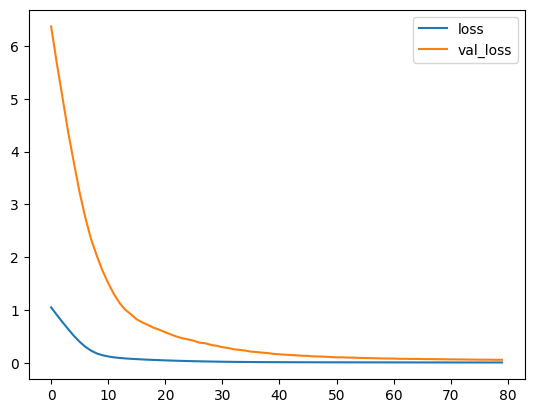

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()


40/40 [==============================] - 0s 2ms/step
Output shape:(1249, 1)


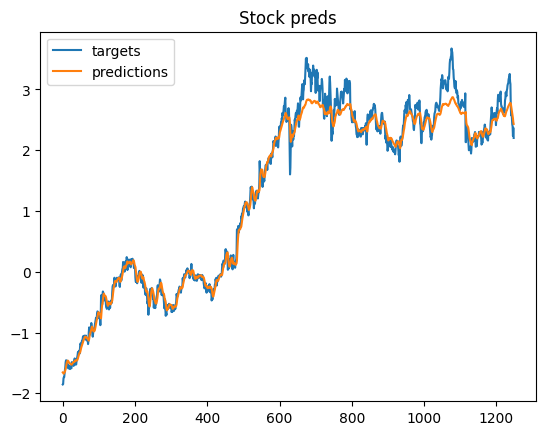

In [ ]:
# One step forecast
output=model.predict(X)
print(f"Output shape:{output.shape}")
preds=output[:,0]

plt.plot(Y,label="targets")
plt.plot(preds,label="predictions")
plt.title("Stock preds")
plt.legend()
plt.show()

In [ ]:
# multi step forecast

validation_target=Y[-N//2:]
validation_preds=[]

last_x=X[-N//2]

while(len(validation_preds)<len(validation_target)):
  p=model.predict(last_x.reshape(1,T,1))[0,0]

validation_preds.append(p)

last_x=np.roll(last_x,-1)
last_x[-1]=p

plt.plot(validation_target,label="TARGET")
plt.plot(validation_preds,label="Predictions")
plt.title("Stock prediction multi step forecast")
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 26s 26s/step


In [ ]:
df["PrevClose"]=df["close"].shift(1)

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [ ]:
df["Return"]=(df["close"]-df["PrevClose"])/df["PrevClose"]
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

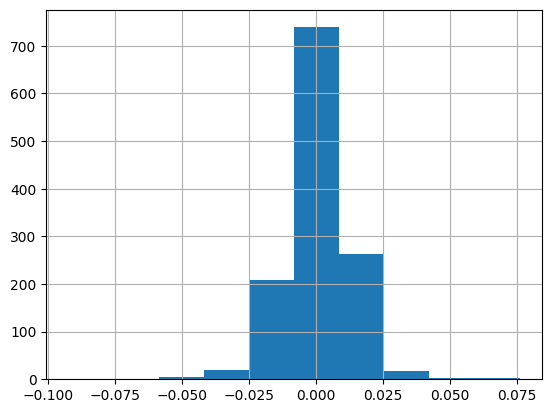

In [ ]:
df["Return"].hist()

In [ ]:
series=df["Return"].values[1:].reshape(-1,1)
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [ ]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)

print(f"The shape of X is : {X.shape},Y is : {Y.shape}")


The shape of X is : (1248, 10, 1),Y is : (1248,)


In [ ]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)

model=Model(i,x)

model.compile(optimizer=Adam(lr=0.01),
              loss="mse")

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[-N//2:],Y[-N//2:]),epochs=80)

Epoch 1/80
20/20 [==============================] - 3s 27ms/step - loss: 1.0041 - val_loss: 1.1466
Epoch 2/80
20/20 [==============================] - 0s 8ms/step - loss: 1.0003 - val_loss: 1.1467
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9956 - val_loss: 1.1459
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9932 - val_loss: 1.1462
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9913 - val_loss: 1.1471
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9897 - val_loss: 1.1493
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9885 - val_loss: 1.1507
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9871 - val_loss: 1.1494
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9866 - val_loss: 1.1512
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9857 - val_loss: 1.1514
Epoch 11/80
20/20 

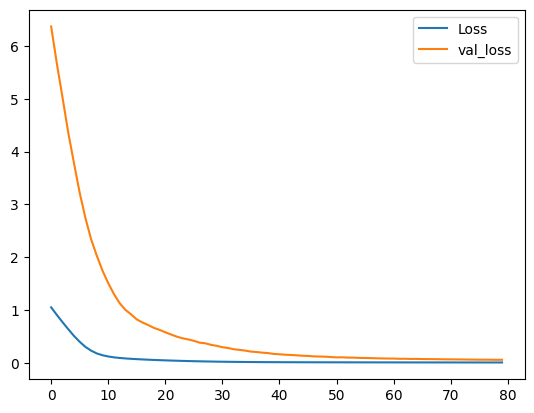

In [ ]:
plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

39/39 [==============================] - 0s 2ms/step
output shape (1248, 1)


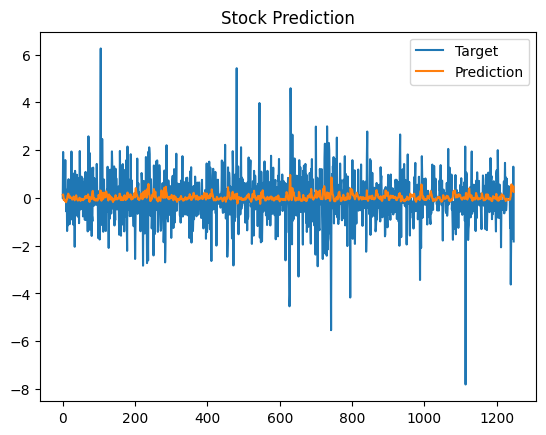

In [ ]:
output=model.predict(X)
print("output shape",output.shape)
preds=output[:,0]

plt.plot(Y,label="Target")
plt.plot(preds,label="Prediction")
plt.title("Stock Prediction")
plt.legend()

In [ ]:
input_data=df[["low","high","close","open","volume"]].values
target=df["Return"].values

In [ ]:
T=10
D=input_data.shape[1]
N=len(input_data)-T
print(N,input_data.shape)

1249 (1259, 5)


In [ ]:
# Normalize inputs
Ntrain=len(input_data)*2//3
scaler=StandardScaler()
scaler.fit(input_data[:Ntrain+T])
input_data=scaler.transform(input_data)

In [ ]:
X_train=np.zeros((Ntrain,T,D))
Y_train=np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :]=input_data[t:t+T]
  Y_train[t]=int(target[t+T]>0)

In [ ]:
X_test=np.zeros((N-Ntrain,T,D))
Y_test=np.zeros(N-Ntrain)

for u in range(N-Ntrain):
  t=u+Ntrain
  X_test[u,:,:]=input_data[t:t+T]
  Y_test[u]=(target[t+T]>0)

In [ ]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation="sigmoid")(x)

model=Model(i,x)

model.compile(optimizer=Adam(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"],)

In [ ]:
r=model.fit(X_train,Y_train,batch_size=32,epochs=300,validation_data=(X_test,Y_test))

Epoch 1/300
27/27 [==============================] - 3s 22ms/step - loss: 0.6960 - accuracy: 0.4994 - val_loss: 0.7102 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.4899 - val_loss: 0.6927 - val_accuracy: 0.5122
Epoch 3/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5197 - val_loss: 0.6942 - val_accuracy: 0.4927
Epoch 4/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5316 - val_loss: 0.6934 - val_accuracy: 0.5024
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.5328 - val_loss: 0.6943 - val_accuracy: 0.4976
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5185 - val_loss: 0.6950 - val_accuracy: 0.4927
Epoch 7/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.5256 - val_loss: 0.6928 - val_accuracy: 0.4976
Epoch 8/300

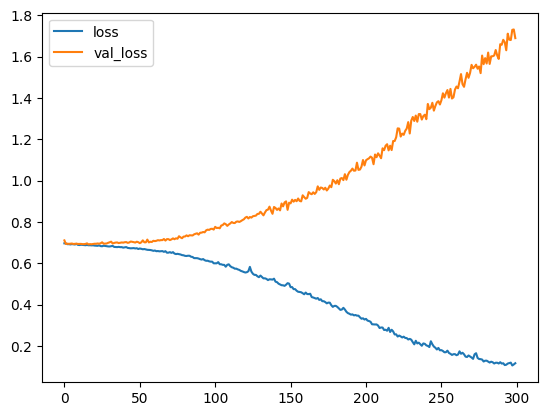

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

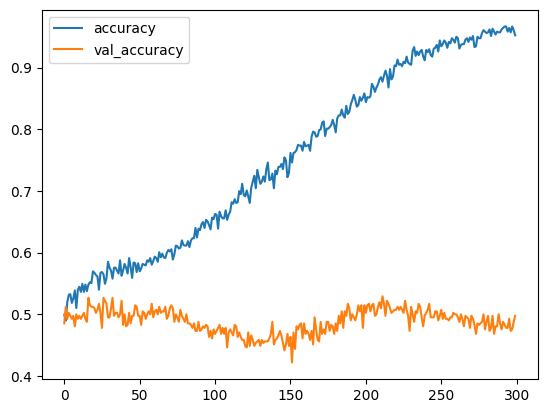

In [ ]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()